In [1]:
texts = ["I left my home state, Ohio, for the Marine Corps when I was 19.", "The main purpose of the Yahoo hack was to gather political and economic intelligence, officials said."]

In [2]:
import sys
import pandas as pd
sys.path.append('/home/retkowski/texty-ml/')
sys.path = list(set(sys.path))

In [8]:
from Import.Preprocessor import Preprocessor
from Import.LinguisticVectorizer import LinguisticVectorizer
from Import.CorpusImporter import CorpusImporter

# Preprocessor

In [4]:
preprocessor = Preprocessor()
preprocessed_texts = []
for text in texts:
    preprocessed_texts.append(preprocessor.get_preprocessed_text(text))
    print(preprocessed_texts[-1])

i left my home state ohio for the marine corps when i was
the main purpose of the yahoo hack was to gather political and economic intelligence officials said


# Linguistic Features

In [56]:
linguisticvectorizer = LinguisticVectorizer()
feature_names = linguisticvectorizer.get_feature_names()
feature_transform = linguisticvectorizer.transform(preprocessed_texts)
print(feature_names)
print(feature_transform)

['text_length' 'number_of_paragraphs' 'average_sent_length'
 'average_word_length' 'number_of_nouns' 'number_of_adjectives'
 'number_of_verbs' 'number_of_numbers' 'type_token_relation'
 'concentration_index' 'hapaxes_index' 'action_index'
 'number_of_question_marks' 'number_of_exclamations'
 'number_of_percentages' 'number_of_currency_symbols'
 'number_of_paragraph_symbols' 'content_fraction' 'number_of_cappsed_words'
 'number_of_first_person_pronouns']
[[ 13.           0.          13.           3.46153846   0.53846154   0.
    0.15384615   0.           0.92307692   1.           0.84615385   1.
    0.           0.           0.           0.           0.           0.46153846
    0.           0.23076923]
 [ 16.           0.          16.           5.25         0.3125       0.1875
    0.1875       0.           0.9375       1.           0.875        0.5
    0.           0.           0.           0.           0.           0.625
    0.           0.        ]]


NameError: name 'feature_namest' is not defined

In [57]:
print(len(feature_names))
print(len(feature_transform[0]))

20
20


In [6]:
df = pd.DataFrame({'opinion' : pd.Series(feature_transform[0], index=linguisticvectorizer.get_feature_names()),
                      'tech' : pd.Series(feature_transform[1], index=linguisticvectorizer.get_feature_names())})

In [7]:
print(df)

                                   opinion     tech
text_length                      13.000000  16.0000
number_of_paragraphs              0.000000   0.0000
average_sent_length              13.000000  16.0000
average_word_length               3.461538   5.2500
number_of_nouns                   0.538462   0.3125
number_of_adjectives              0.000000   0.1875
number_of_verbs                   0.153846   0.1875
number_of_numbers                 0.000000   0.0000
type_token_relation               0.923077   0.9375
concentration_index               1.000000   1.0000
hapaxes_index                     0.846154   0.8750
action_index                      1.000000   0.5000
number_of_question_marks          0.000000   0.0000
number_of_exclamations            0.000000   0.0000
number_of_percentages             0.000000   0.0000
number_of_currency_symbols        0.000000   0.0000
number_of_paragraph_symbols       0.000000   0.0000
content_fraction                  0.461538   0.6250
number_of_ca

In [11]:
corpus = CorpusImporter()
corpus.clearMemory()

In [12]:
corpus.crawlNYT(whitelist=['Technology','Politics','Sports'], is_multilabel=False)

Maximum Documents:  30
Reading archives [/home/retkowski/nltk_data/nyt/2007]:  ['01.tgz', '02.tgz', '03.tgz', '04.tgz', '05.tgz', '06.tgz']


In [14]:
print(len(corpus._Collection))
print(corpus._Collection[0])

30
Item(text="\n        Marquette point guard Dominic James wore dark blue knee-highs Sunday afternoon to warm his legs, not because he was trying to make a fashion statement. But his team's play definitely made an impression.\n        ''They're a great team, don't get me wrong,'' James said. ''But we're here. We're here.''\n        The Golden Eagles ended sixth-ranked Pittsburgh's 12-game home winning streak with a 77-74 overtime triumph, their fourth consecutive victory over all and third in a row on the road.\n        James, who scored a game-high 23 points, made two free throws with less than a second remaining in overtime to secure the victory for No. 24 Marquette (17-4, 4-2 Big East).\n        James and the Golden Eagles passed through a capacity crowd of 12,508 and a Panthers team that began Big East play with a 5-0 record matched in team history by only the 2002-3 team.\n        The winning streak for Pittsburgh (17-3, 5-1) included victories against Georgetown and Connecticut 

In [33]:
from sklearn.preprocessing import StandardScaler
#from sklearn.feature_extraction.text import TfidfTransformer
#from sklearn.feature_extraction.text import CountVectorizer
#from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.decomposition import PCA
#from sklearn.linear_model import LogisticRegression
#from sklearn.decomposition import TruncatedSVD
#from nltk.corpus import stopwords
#from nltk.stem.snowball import SnowballStemmer 
#from nltk import PorterStemmer
#from nltk import LancasterStemmer
#from sklearn.feature_selection import SelectKBest
#from sklearn.feature_selection import f_classif
from sklearn import tree

lv = LinguisticVectorizer()
clf = tree.DecisionTreeClassifier()

pca = PCA(n_components=3)

fu = FeatureUnion([
    ('lv', Pipeline([
      ('linguistic', lv)
    ]))
])

pipeline = Pipeline([
  ('features', fu),
  ('scaler', StandardScaler(with_mean=True)),
  #('dim_red', pca),
  ('classifier', clf)
])

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split([news.text for news in corpus._Collection if news.text is not None], [news.tags[0] for news in corpus._Collection if news.text is not None], test_size=0.2, random_state=42)

In [24]:
print(Y_train[2])

Sports


In [35]:
pipeline.fit(X_train, Y_train)

Pipeline(steps=[('features', FeatureUnion(n_jobs=1,
       transformer_list=[('lv', Pipeline(steps=[('linguistic', LinguisticVectorizer())]))],
       transformer_weights=None)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('classifier', DecisionTreeClassifier(class_weight=None, cri...it=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'))])

In [36]:
print(pipeline.score(X=X_test,y=Y_test))

0.166666666667


In [32]:
print(len(X_train))

24


In [50]:
clf_tree = tree.DecisionTreeClassifier(max_depth=3)


In [41]:
print(lv.get_feature_names())

['text_length' 'number_of_paragraphs' 'average_sent_length'
 'average_word_length' 'number_of_nouns' 'number_of_adjectives'
 'number_of_verbs' 'number_of_numbers' 'type_token_relation'
 'concentration_index' 'hapaxes_index' 'action_index'
 'number_of_question_marks' 'number_of_exclamations'
 'number_of_percentages' 'number_of_currency_symbols'
 'number_of_paragraph_symbols' 'content_fraction' 'number_of_cappsed_words'
 'number_of_first_person_pronouns']


In [47]:
train_data = lv.transform(X_train)

In [54]:
test_data = lv.transform(X_test)

In [51]:
clf_tree.fit(X=train_data, y=Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

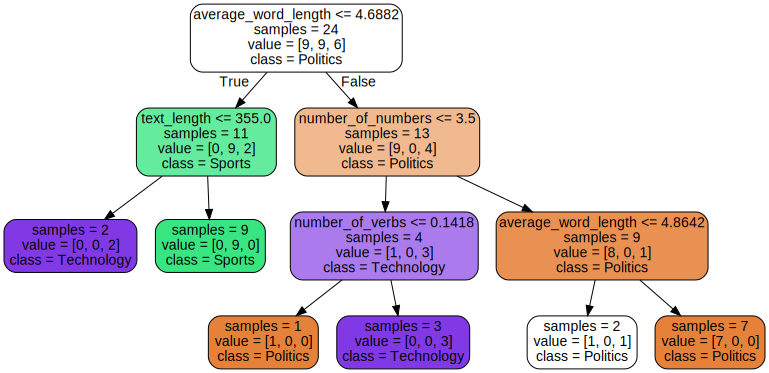

In [53]:
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(clf_tree, 
                out_file="decisiontree.dot",
                feature_names=lv.get_feature_names(),
                class_names=pipeline.classes_,
                filled=True,
                rounded=True,
                impurity=False )
with open("decisiontree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [55]:
print(clf_tree.score(X=test_data, y=Y_test))

0.166666666667
